# Analysis of Daily Market Prices of Tomato

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Mar 21 10:49:29 2017

@author: harshel
"""

import pandas as pd
import numpy as np
from lxml import etree
import lxml 
import matplotlib.pyplot as plt
%matplotlib inline

## Read Files

In [2]:
fname = ["/home/user/Downloads/Tomato_2014.xml",
         "/home/user/Downloads/Tomato_2015.xml",
         "/home/user/Downloads/Tomato_2016.xml"]
def get_root(file):
    tree = etree.parse(file)
    root = tree.getroot()
    return root

## XML to Dataframe

In [3]:
def get_df(filename):
    root = get_root(filename)
    label_root = root.findall(".//*[@name='Table']")[0].getchildren()[0].getchildren()[0].getchildren()
    l_labelval = []
    for val in label_root:
        l_labelval.append(val.values()[0])
    row_root = root.findall(".//*[NewDataSet]")[0].getchildren()[0].getchildren()
    l_rowmain = []
    for x in row_root:
        l_rowlocal = []
        for val in x:
            l_rowlocal.append(val.text)    
        l_rowmain.append(l_rowlocal)
    df_temp = pd.DataFrame.from_records(l_rowmain, columns=l_labelval) 
    return df_temp        

## Merging dataframes

In [4]:
df = pd.DataFrame() 
for name in fname:
    df = df.append(get_df(name), ignore_index='true')    

## Converting Arrival to Date

In [5]:
Adata = pd.to_datetime(df['Arrival_Date'], dayfirst=True)
df['Year'] = Adata.dt.year
df['Month'] = Adata.dt.month
df['Day'] = Adata.dt.day
df.drop('Arrival_Date', axis=1, inplace=True)

## Adding seasons column to the dataframe

In [6]:
df.loc[(df['Month']==1) | (df['Month']==2) | (df['Month']==3), 'Season'] = 'Winter'
df.loc[(df['Month']==4) | (df['Month']==5) | (df['Month']==6), 'Season'] = 'Summer'
df.loc[(df['Month']==7) | (df['Month']==8) | (df['Month']==9), 'Season'] = 'Monsoon'
df.loc[(df['Month']==10) | (df['Month']==11) | (df['Month']==12), 'Season'] = 'Spring'

## Plot for Ques - 1

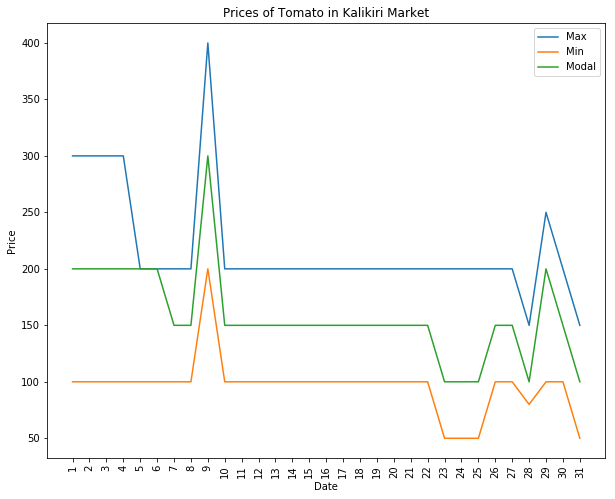

In [7]:
df_1 = df[(df['Year']==2014) & (df['Month']==1) & (df['Market']=='Kalikiri')]
fig = plt.figure(figsize=(10, 8))
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Prices of Tomato in Kalikiri Market')
asd = list(df_1['Day'])
art = list(df_1['Day'].index)
plt.xticks(art, asd, rotation='vertical')
ay = df_1['Min_x0020_Price']
ax = df_1['Max_x0020_Price']
az = df_1['Modal_x0020_Price']
x,= plt.plot(ax, label='Max')
y,= plt.plot(ay, label='Min')
z,= plt.plot(az, label='Modal')
plt.legend()
plt.show()


## Converting Min, Max and Modal Columns to Float

In [8]:
df['Min_x0020_Price'] = df['Min_x0020_Price'].astype(float)
df['Max_x0020_Price'] = df['Max_x0020_Price'].astype(float)
df['Modal_x0020_Price'] = df['Modal_x0020_Price'].astype(float)

## Plot for Ques - 2

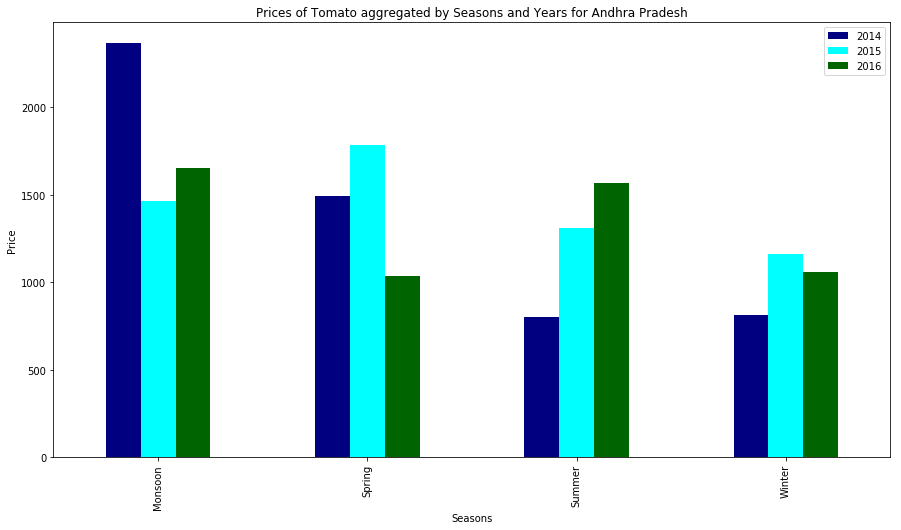

In [9]:
df_2 = df.groupby(['Year','Season'])['Min_x0020_Price'].mean().unstack('Year').plot(kind='bar', 
                                                                                    figsize=(15,8), 
                                                                                    color=['navy','cyan','darkgreen'])
plt.xlabel('Seasons')
plt.ylabel('Price')
plt.title('Prices of Tomato aggregated by Seasons and Years for Andhra Pradesh')
plt.legend()
plt.show()